# PyAudio

In [2]:
import pyaudio
import wave
import sys
CHUNK = 1024
filename = "piano.wav"

if len(sys.argv) < 2:
    print("Plays a wave file: ", filename)
    sys.exit(-1)

wf = wave.open(filename, 'rb')
p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)
data = wf.readframes(CHUNK)

# while data != '': #The play will never end.
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)

stream.stop_stream()
stream.close()
p.terminate()
print("Play end!")

Play end!


# Sounddevice
###### It's very convenient to use.

In [4]:
# Generate 440Hz sinusoidal wave and play.
import numpy as np
import sounddevice as sd

fs = 44100 # Hz
f = 440 # Hz
length = 5 #s

myarray = np.arange(fs * length)
myarray = np.sin(2 * np.pi * f / fs * myarray)
sd.play(myarray, fs)
print("Play end!")

Play end!


In [7]:
# Record
import sounddevice as sd
from scipy.io import wavfile

fs = 44100 # Hz
length = 1 # s

recording = sd.rec(frames=fs * length, samplerate=fs, blocking=True, channels=1)
wavfile.write("recording.wav", fs, recording)
print("Finished!")

Finished!


# Wave

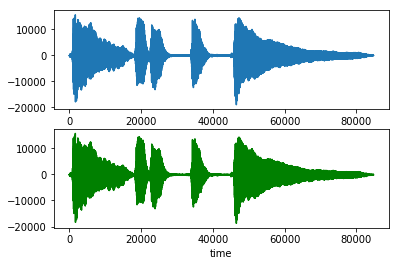

In [13]:
import wave
import numpy as np
import matplotlib.pyplot as plt

f = wave.open("piano.wav", "rb")
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
f.close()

wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1, 2
wave_data = wave_data.T
#time = np.arange(0, nframes) * (1.0 / framerate)

# Plot
plt.subplot(211) 
plt.plot(wave_data[0])
plt.subplot(212) 
plt.plot(wave_data[1], c="g")
plt.xlabel("time")
plt.show()

# pyAudioAnalysis

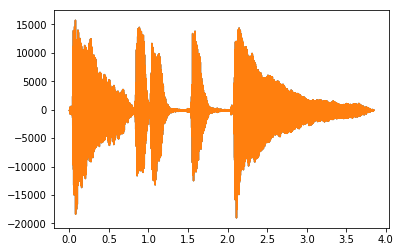

In [7]:
# Only python2
import numpy as np
import matplotlib.pyplot as plt
from pyAudioAnalysis import audioBasicIO

[Fs, x] = audioBasicIO.readAudioFile("piano.wav");
time = np.arange(0,len(x))*1.0/Fs
plt.plot(time,x)
plt.show()